In [40]:
%matplotlib inline

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# import sckitlearn.

In [82]:
# D=pd.read_csv("../Titanic/gender_submission.csv")
# D.head()

In [122]:
D=pd.read_csv("../Titanic/train.csv")
D.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [43]:
# DS=pd.read_csv("../Titanic/test.csv")
# DS.head()

In [44]:
# def lineplot(x_data, y_data, x_label="", y_label="", title=""):
#     # Create the plot object
#     _, ax = plt.subplots()

#     # PlotDT the best fit line, set the linewidth (lw), color and
#     # transparency (alpha) of the line
#     ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

#     # Label the axes and provide a title
#     ax.set_title(title)
#     ax.set_xlabel(x_label)
#     ax.set_ylabel(y_label)

In [84]:
D.describe(include= 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Harrison, Mr. William",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [123]:
# feature engineering

# Parch
D.Parch.unique()
D.Parch[D.Parch>1]=1

/home/charlie/environments/PFDS/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [126]:
#Pclass
D.Pclass.unique()

array([3, 1, 2])

In [86]:
#encoding some features into categorical numbers
# DT.drop("Name", axis=1)
D.Sex=D.Sex.astype("category").cat.codes
D.Ticket=D.Ticket.astype('category').cat.codes
D.Cabin=D.Cabin.astype('category').cat.codes
D.Embarked=D.Embarked.astype('category').cat.codes

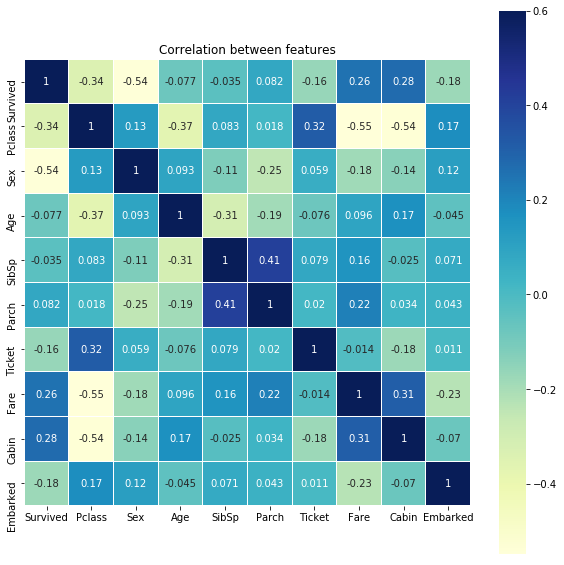

In [87]:
corr=D.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=0.6, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [100]:
#drop the outcome and save it as a separate DF, also drop non numeric ALSO DROP NA
DT=D
DT=DT.dropna(axis=0)
DTy=DT[['Survived']].copy()
DT=DT.drop(["Name","Survived"], axis=1)
DT=DT.dropna(axis=0)
# DT.drop("Cabin", axis=1)
# DT.drop("Name", axis=1)

In [50]:
# # refining data for test
# DS.Sex=DS.Sex.astype("category").cat.codes
# DS.Ticket=DS.Ticket.astype('category').cat.codes
# DS.Cabin=DS.Cabin.astype('category').cat.codes
# DS.Embarked=DS.Embarked.astype('category').cat.codes

In [51]:
# DS=DS.drop(["Name","Cabin"], axis=1)
# DS=DS.dropna(axis=0)

In [52]:
# result=model.predict(DS)

In [53]:
# print(result)

In [101]:
from sklearn. model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(DT,DTy,test_size=0.33)

In [102]:
# fit log rrg model with numeric non nan, numeric data
model = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train,Y_train)

/home/charlie/environments/PFDS/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
model.score(X_test,Y_test)


0.7838983050847458

In [107]:
from sklearn.svm import SVC
model2=SVC(gamma='auto').fit(X_train,Y_train)
model2.score(X_test,Y_test)


/home/charlie/environments/PFDS/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.597457627118644

In [108]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)
model3.score(X_test,Y_test)

0.7669491525423728

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)
model3.score(X_test,Y_test)